In [1]:
import re
import requests
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.tree import Tree
import nltk
import spacy

nlp = spacy.load('en_core_web_sm')

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\v_gol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\v_gol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
urls = ['https://www.gutenberg.org/cache/epub/12/pg12.txt', 'https://www.gutenberg.org/cache/epub/11/pg11.txt', 'https://www.gutenberg.org/cache/epub/29042/pg29042.txt']
def load_texts(urls):
    stop_words = set(stopwords.words('english'))
    corpus = []

    for url in urls:
        # Step 1: Load the URL content
        response = requests.get(url)
        text = response.text

        # Step 2: Clean non-words using regular expressions
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        
        # Step 3: Trim the text to ignore parts before 'START' and after '*** END'
        start_index = text.find('START')
        end_index = text.find('*** END')
        if start_index != -1 and end_index != -1:
            text = text[start_index+len('START'):end_index]
        
        # Append the cleaned and trimmed text to the corpus
        corpus.append(text)

    # Step 6: Print the first 200 characters of each text
    for i, text in enumerate(corpus):
        print(f"First 200 characters of text {i+1}:\n{text[:200]}\n")

    # Step 7: Tokenize the text and print the first 150 tokens
    for i, text in enumerate(corpus):
        tokens = word_tokenize(text)
        print(f"First 150 tokens of text {i+1}:\n{tokens[:150]}\n")

    # Step 8: Remove stopwords and verify
    cleaned_corpus = []
    for text in corpus:
        tokens = word_tokenize(text)
        cleaned_tokens = [word for word in tokens if word.lower() not in stop_words]
        cleaned_corpus.append(' '.join(cleaned_tokens))
        
        # Check if stopwords are removed
        stopword_count = sum(word.lower() in stop_words for word in cleaned_tokens)
        print(f"Stopwords count after removal: {stopword_count}")

    # Step 9: Use PorterStemmer to print the first 50 stemmed tokens
    ps = PorterStemmer()
    for i, text in enumerate(cleaned_corpus):
        tokens = word_tokenize(text)
        stemmed_tokens = [ps.stem(token) for token in tokens]
        print(f"First 50 stemmed tokens of text {i+1}:\n{stemmed_tokens[:50]}\n")

    # Step 10: Use spaCy to print the first 50 lemmatized tokens
    for i, text in enumerate(cleaned_corpus):
        doc = nlp(text)
        lemmatized_tokens = [token.lemma_ for token in doc]
        print(f"First 50 lemmatized tokens of text {i+1}:\n{lemmatized_tokens[:50]}\n")

    # Step 11: POS tagging using NLTK
    for i, text in enumerate(corpus):
        tokens = word_tokenize(text)
        pos_tags = pos_tag(tokens)
        print(f"POS tags of text {i+1}:\n{pos_tags[:50]}\n")

    # Step 12: Named Entity Recognition using NLTK
    for i, text in enumerate(corpus):
        tokens = word_tokenize(text)
        pos_tags = pos_tag(tokens)
        chunks = ne_chunk(pos_tags)
        entities = []
        for chunk in chunks:
            if isinstance(chunk, Tree):
                entity = " ".join(c[0] for c in chunk)
                entity_type = chunk.label()
                entities.append((entity, entity_type))
        print(f"Named entities in text {i+1}:\n{entities}\n")

    return cleaned_corpus


text = load_texts(urls)
print(text)

First 200 characters of text 1:
The Project Gutenberg eBook of Through the LookingGlass
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restri

First 200 characters of text 2:
The Project Gutenberg eBook of Alices Adventures in Wonderland
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no

First 200 characters of text 3:
The Project Gutenberg eBook of A Tangled Tale
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
wh

First 150 tokens of text 1:
['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Through', 'the', 'LookingGlass', 'This', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'alm

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

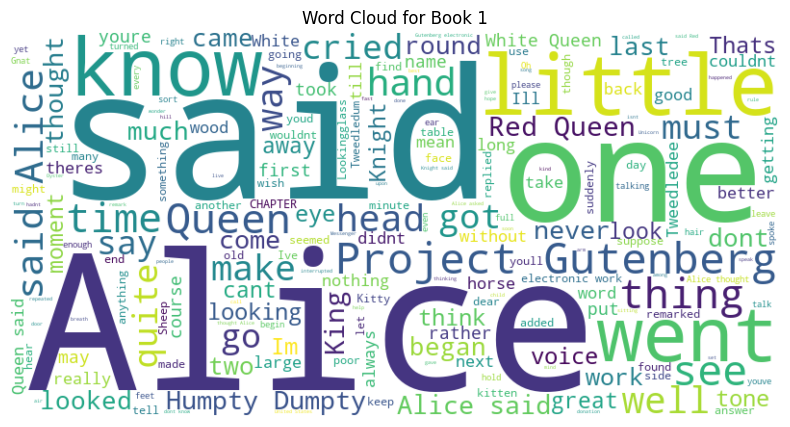

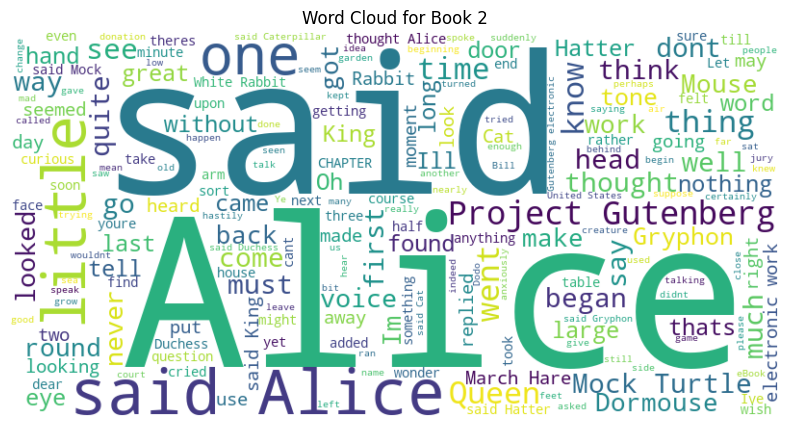

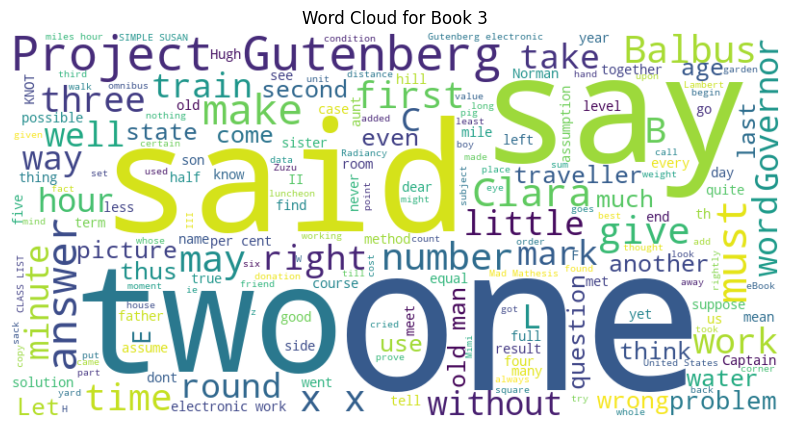

In [7]:
for i, book_text in enumerate(text):
    generate_wordcloud(book_text, f"Word Cloud for Book {i+1}")

Bag of Words:
Word: said, Count: 1059
Word: Alice, Count: 827
Word: one, Count: 401
Word: little, Count: 286
Word: Project, Count: 252


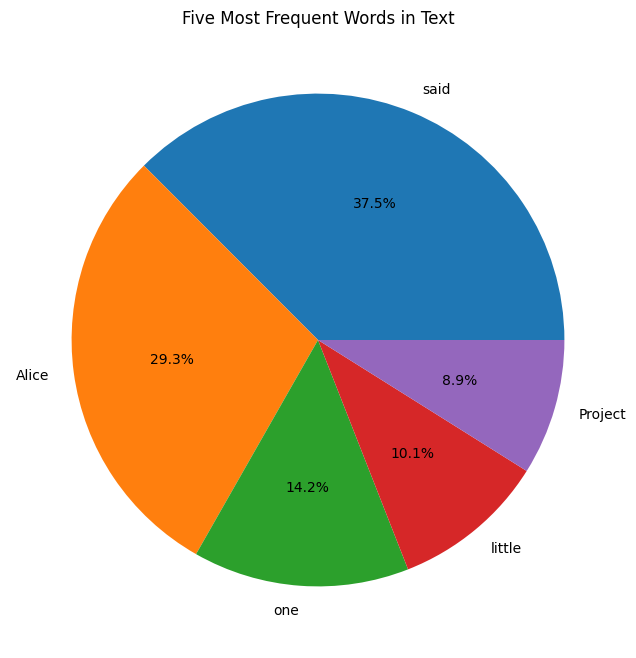

In [8]:
from collections import Counter

# Concatenate all the cleaned and tokenized texts
combined_text = ' '.join(text)

# Tokenize the combined text
tokens = combined_text.split()

# Create a bag of words (BoW) using Counter
bow = Counter(tokens)

# Get the five most common words
top_five_words = bow.most_common(5)

# Print the BoW
print("Bag of Words:")
for word, count in top_five_words:
    print(f"Word: {word}, Count: {count}")

# Display a pie plot of the five most frequent words
top_words, word_counts = zip(*top_five_words)
plt.figure(figsize=(8, 8))
plt.pie(word_counts, labels=top_words, autopct='%1.1f%%')
plt.title('Five Most Frequent Words in Text')
plt.show()

Top 5 most relevant words in Document 1:
Word: humpty, TF-IDF Score: 0.35629739657709913
Word: dumpty, TF-IDF Score: 0.3499349430667938
Word: knight, TF-IDF Score: 0.2806509736031808
Word: tweedledum, TF-IDF Score: 0.22904832637099232
Word: tweedledee, TF-IDF Score: 0.17178624477824422


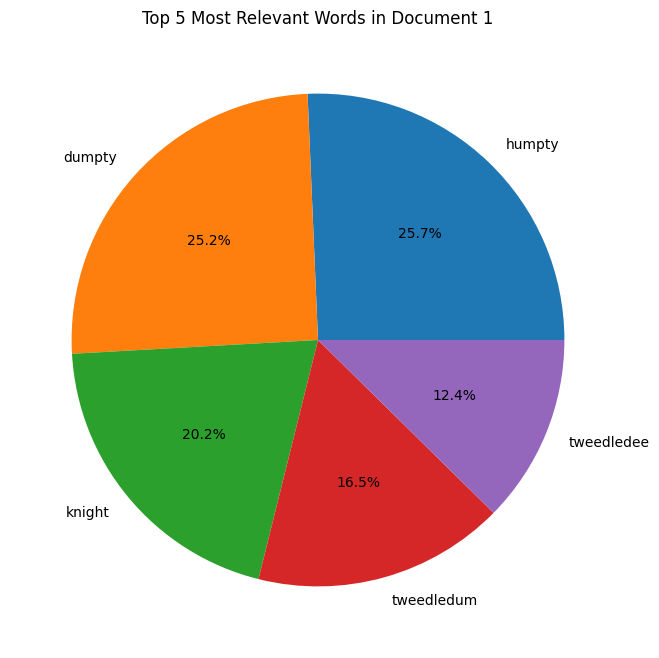

Top 5 most relevant words in Document 2:
Word: gryphon, TF-IDF Score: 0.33979081733168803
Word: rabbit, TF-IDF Score: 0.2718326538653504
Word: mock, TF-IDF Score: 0.2678167539282668
Word: turtle, TF-IDF Score: 0.2631182143856657
Word: hatter, TF-IDF Score: 0.2584196748430645


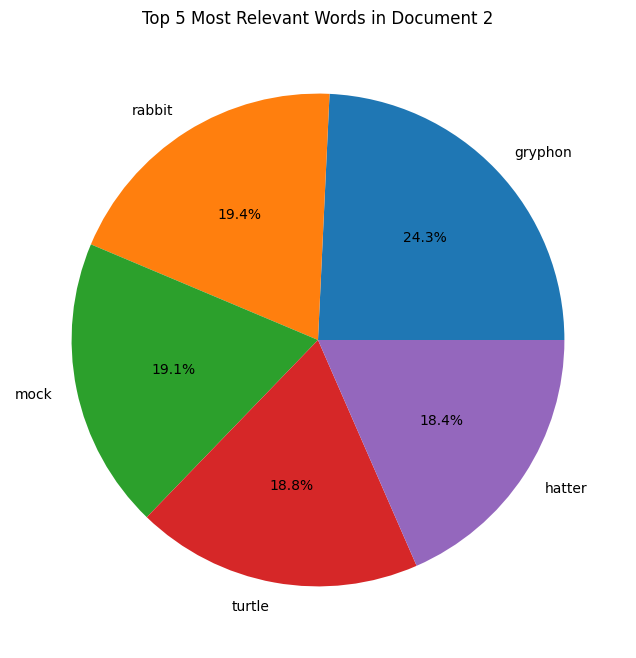

Top 5 most relevant words in Document 3:
Word: balbus, TF-IDF Score: 0.3149927107958002
Word: clara, TF-IDF Score: 0.25772130883292743
Word: answers, TF-IDF Score: 0.1887443020194624
Word: marks, TF-IDF Score: 0.1527237385676607
Word: hugh, TF-IDF Score: 0.1479511217374213


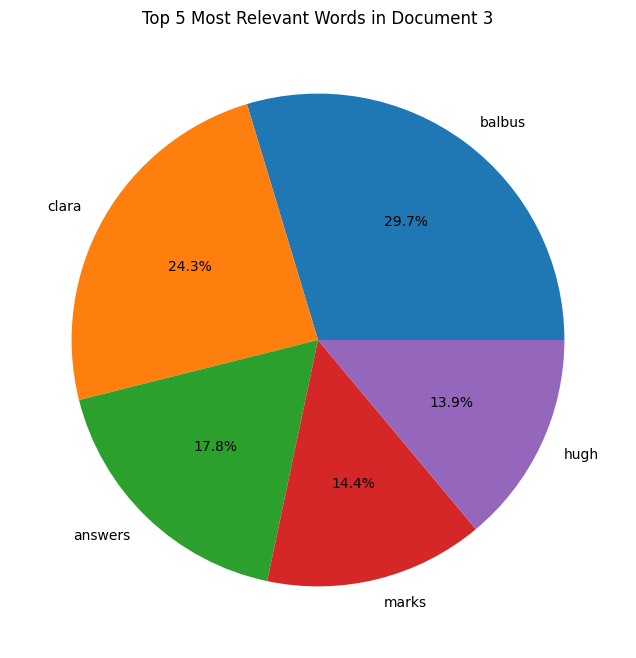

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df=2)

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(text)

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Iterate over each document
for i, doc in enumerate(text):
    # Get TF-IDF scores for the document
    doc_scores = tfidf_matrix[i, :].toarray().flatten()

    # Create a dictionary to store word scores
    word_scores = dict(zip(feature_names, doc_scores))

    # Sort the word scores by TF-IDF score in descending order
    sorted_word_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)

    # Get the top 5 most relevant words
    top_five_words = sorted_word_scores[:5]

    # Print the top 5 most relevant words
    print(f"Top 5 most relevant words in Document {i+1}:")
    for word, score in top_five_words:
        print(f"Word: {word}, TF-IDF Score: {score}")

    # Display a pie plot of the five most relevant words
    top_words, word_scores = zip(*top_five_words)
    plt.figure(figsize=(8, 8))
    plt.pie(word_scores, labels=top_words, autopct='%1.1f%%')
    plt.title(f'Top 5 Most Relevant Words in Document {i+1}')
    plt.show()
